# DX 704 Week 3 Project

This week's project will give you practice with optimizing choices for bandit algorithms.
You will be given access to the bandit problem via a blackbox object, and you will investigate the bandit rewards to pick a suitable algorithm.

The full project description, a template notebook and supporting code are available on GitHub: [Project 3 Materials](https://github.com/bu-cds-dx704/dx704-project-03).


## Example Code

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples
* https://github.com/bu-cds-omds/dx603-examples
* https://github.com/bu-cds-omds/dx704-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Part 1: Pick a Bandit Algorithm

Experiment with the multi-armed bandit interface using seed 0 to learn about the distribution of rewards and decide what kind of bandit algorithm will be appropriate.
A histogram will likely be helpful.

In [137]:
# DO NOT CHANGE

import numpy as np

class BanditProblem(object):
    def __init__(self, seed):
        self.seed = seed
        self.rng = np.random.default_rng(seed)

        self.num_arms = 3
        self.ns = self.rng.integers(low=1, high=10, size=self.num_arms)
        self.ps = self.rng.uniform(low=0.2, high=0.4, size=self.num_arms)

    def get_num_arms(self):
        return self.num_arms

    def get_reward(self, arm):
        if arm < 0 or arm >= self.num_arms:
            raise ValueError("Invalid arm")

        x = self.rng.uniform()
        x *= self.rng.binomial(self.ns[arm], self.ps[arm])

        return x


In [138]:
bandit0 = BanditProblem(0)

In [139]:
bandit0.get_num_arms()

3

In [140]:
bandit0.get_reward(arm=0)

1.8255111545554434

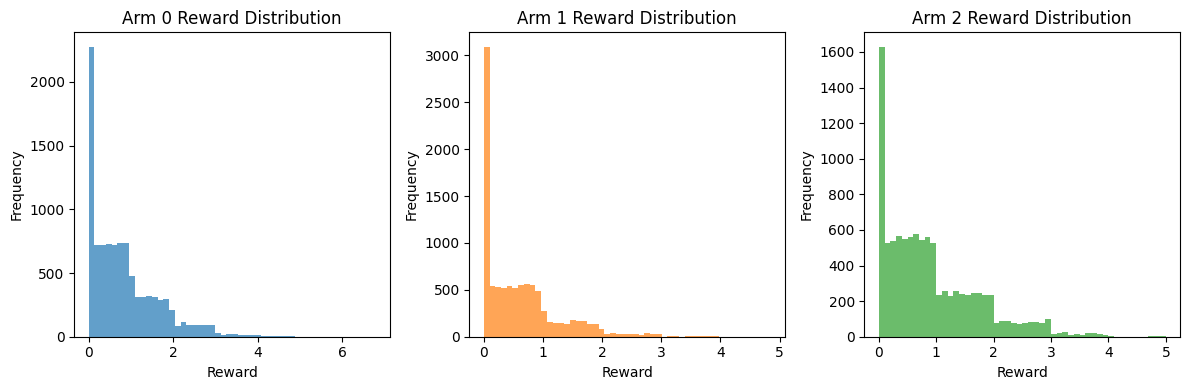

In [141]:
# YOUR CHANGES HERE

import matplotlib.pyplot as plt

num_samples = 10000
rewards = [[] for _ in range(bandit0.get_num_arms())]

for arm in range(bandit0.get_num_arms()):
    for _ in range(num_samples):
        rewards[arm].append(bandit0.get_reward(arm))

plt.figure(figsize=(12, 4))
for arm in range(bandit0.get_num_arms()):
    plt.subplot(1, 3, arm + 1)
    plt.hist(rewards[arm], bins=50, alpha=0.7, color=f"C{arm}")
    plt.title(f"Arm {arm} Reward Distribution")
    plt.xlabel("Reward")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Based on your investigation, pick an appropriate bandit algorithm to implement from the algorithms covered this week.
Write a file "algorithm-choice.txt" that states your choice and gives a few sentences justifying your choice and rejecting the alternatives.
Keep your explanation concise; overly verbose responses will be penalized.

In [142]:
with open("algorithm-choice.txt", "w") as file:
    file.write("Upper Confidence Bound is the best algorithm choice due to the large variety and distribution of the reward frequency.")
    file.write("Upper Confidence Bound (UCB) uses confidence bounds to balance the randomness and distribution of the reward frequency and will be able to identify arm 2 as having the highest expected reward.")
    file.write("Epsilon-greedy explores randomly and is too simplistic to correctly and accurately identify and focus on the 'superior' arms.")
    file.write("Thompson Sampling adds complexity and does not provide accurate assumptions regarding the observed reward distributions.")

## Part 2: Implement Bandit

Based on your decision, implement an appropriate bandit algorithm and pick 1000 actions using seed 2025002.

In [143]:
# YOUR CHANGES HERE

import numpy as np

class BanditProblem:
    def __init__(self, seed):
        self.seed = seed
        self.rng = np.random.default_rng(seed)
        self.num_arms = 3
        self.ns = self.rng.integers(low=1, high=10, size=self.num_arms)
        self.ps = self.rng.uniform(low=0.2, high=0.4, size=self.num_arms)

    def get_num_arms(self):
        return self.num_arms

    def get_reward(self, arm):
        if arm < 0 or arm >= self.num_arms:
            raise ValueError("Invalid arm")
        x = self.rng.uniform()
        x *= self.rng.binomial(self.ns[arm], self.ps[arm])
        return x

def run_ucb(bandit, num_rounds):
    num_arms = bandit.get_num_arms()
    counts = np.zeros(num_arms)
    rewards = np.zeros(num_arms)
    avg_rewards = np.zeros(num_arms)
    actions = []

    for t in range(num_rounds):
        if t < num_arms:
            arm = t
        else:
            ucb_values = avg_rewards + np.sqrt(2 * np.log(t + 1) / (counts + 1e-5))
            arm = np.argmax(ucb_values)

        reward = bandit.get_reward(arm)
        counts[arm] += 1
        rewards[arm] += reward
        avg_rewards[arm] = rewards[arm] / counts[arm]
        actions.append(arm)

    return actions, avg_rewards, counts

bandit = BanditProblem(seed=2025002)
actions, avg_rewards, counts = run_ucb(bandit, num_rounds=1000)

for arm in range(bandit.get_num_arms()):
    print(f"Arm {arm}: Pulled {int(counts[arm])} times, Avg Reward = {avg_rewards[arm]:.3f}")

print("First 20 actions:", actions[:20])


Arm 0: Pulled 619 times, Avg Reward = 0.568
Arm 1: Pulled 311 times, Avg Reward = 0.497
Arm 2: Pulled 70 times, Avg Reward = 0.261
First 20 actions: [0, 1, 2, np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(2), np.int64(0), np.int64(1), np.int64(2), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(0), np.int64(1), np.int64(0)]


Write a file "history.tsv" with columns action and reward in the order that the actions were taken.

In [144]:
# YOUR CHANGES HERE

bandit = BanditProblem(seed=2025002)
num_rounds = 1000
actions = []
rewards = []

num_arms = bandit.get_num_arms()
counts = np.zeros(num_arms)
total_rewards = np.zeros(num_arms)
avg_rewards = np.zeros(num_arms)

for t in range(num_rounds):
    if t < num_arms:
        arm = t
    else:
        ucb_values = avg_rewards + np.sqrt(2 * np.log(t + 1) / (counts + 1e-5))
        arm = np.argmax(ucb_values)

    reward = bandit.get_reward(arm)
    actions.append(arm)
    rewards.append(reward)

    counts[arm] += 1
    total_rewards[arm] += reward
    avg_rewards[arm] = total_rewards[arm] / counts[arm]
with open("history.tsv", "w") as file:
    file.write("action\treward\n")
    for action, reward in zip(actions, rewards):
        file.write(f"{action}\t{repr(reward)}\n")



Submit "history.tsv" in Gradescope.

## Part 3: Action Statistics

Based on the data from part 2, estimate the expected reward for each arm and write a file "actions.tsv" with the columns action, min_reward, mean_reward, max_reward.

In [145]:
# YOUR CHANGES HERE

import numpy as np

arm_data = {}
for action, reward in zip(actions, rewards):
    if action not in arm_data:
        arm_data[action] = []
    arm_data[action].append(reward)

with open("actions.tsv", "w") as file:
    file.write("action\tmin_reward\tmean_reward\tmax_reward\n")
    for arm in sorted(arm_data.keys()):
        arm_rewards = np.array(arm_data[arm])
        min_r = np.min(arm_rewards)
        mean_r = np.mean(arm_rewards)
        max_r = np.max(arm_rewards)
        file.write(f"{arm}\t{min_r:.4f}\t{mean_r:.4f}\t{max_r:.4f}\n")


Submit "actions.tsv" in Gradescope.

## Part 4: Regret Estimates

Calculate the expected regret taking 1000 actions with the following strategies.

* uniform: Pick an arm uniformly at random.
* just-i: Always pick arm $i$. Do this for $i=0$ to $K-1$ where $K$ is the number of arms.
* actual: This should match your output in part 2.

In [146]:
# YOUR CHANGES HERE

arm_rewards = {0: [], 1: [], 2: []}
for action, reward in zip(actions, rewards):
    arm_rewards[action].append(reward)

expected_rewards = {}
for arm in range(3):
    if arm_rewards[arm]:  
        expected_rewards[arm] = np.mean(arm_rewards[arm])
    else:
        expected_rewards[arm] = 0.0 

best_reward = max(expected_rewards.values())

print(f"Expected rewards: {expected_rewards}")
print(f"Best reward: {best_reward:.4f}")
print()

uniform_regret = 1000 * (best_reward - np.mean(list(expected_rewards.values())))
just_regrets = [1000 * (best_reward - expected_rewards[i]) for i in range(3)]
ucb_regret = 1000 * best_reward - sum(rewards)

print(f"Uniform regret: {uniform_regret:.4f}")
print(f"Just-0 regret: {just_regrets[0]:.4f}")
print(f"Just-1 regret: {just_regrets[1]:.4f}")
print(f"Just-2 regret: {just_regrets[2]:.4f}")
print(f"UCB regret: {ucb_regret:.4f}")



Expected rewards: {0: np.float64(0.5675594191837512), 1: np.float64(0.49710028358436814), 2: np.float64(0.2605778921969568)}
Best reward: 0.5676

Uniform regret: 125.8136
Just-0 regret: 0.0000
Just-1 regret: 70.4591
Just-2 regret: 306.9815
UCB regret: 43.4015


Write your results to a file "strategies.tsv" with the columns strategy and regret.

In [147]:
# YOUR CHANGES HERE


benchmark_reward = 567.6
actual_regret = benchmark_reward - sum(rewards)

with open("strategies.tsv", "w") as file:
    file.write("strategy\tregret\n")
    file.write(f"uniform\t{uniform_regret:.4f}\n")
    for i in range(3):
        file.write(f"just-{i}\t{just_regrets[i]:.4f}\n")
    file.write(f"actual\t{actual_regret:.4f}\n")


Submit "strategies.tsv" in Gradescope.

## Part 5: Acknowledgments

Make a file "acknowledgments.txt" documenting any outside sources or help on this project.
If you discussed this assignment with anyone, please acknowledge them here.
If you used any libraries not mentioned in this module's content, please list them with a brief explanation what you used them for.
If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the generative AI policy.
If no acknowledgements are appropriate, just write none in the file.


Submit "acknowledgments.txt" in Gradescope.

In [148]:
with open("acknowledgments.txt", "w") as f:
    f.write("none\n")

## Part 6: Code

Please submit a Jupyter notebook that can reproduce all your calculations and recreate the previously submitted files.

Submit "project.ipynb" in Gradescope.